#### Introduction about Project:
Main Agenda of the Analytical Project is to predict the heart disease presence of Heart Disease in a patient using different atttibutes. The original dataset contais 75 attributes but not every attribute is important for predictive models. To avoid issue in the model, the dataset has been converted in to 14 attributes and more than 300 observations by researcher. The data is coming from Cleveland and this is the first time that any of researcher has worked on Cleveland heart disease.

Credits to the Researcher for Data:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

URL to get multiple datas and original as well as processed data is: [UCI Machine Learing Repository: Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

### Data Extraction:
* Public Data:
Data set is publicly available to download and it has the URL from where Data Set can be downloaded and improted in to the system. One can directly use URL to add data to the project and using URL it can be loaded. UCI Machine Learning has the data set and creditors as well as link to download data set is as below:

    Credits to the Researcher for Data:
    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

   URL to get multiple datas and original as well as processed data is: [UCI Machine Learing Repository: Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
   
   
* Data Set Description:

 - Data Set contains 14 attributes and 300+ observations. Out of 14 attributes one is predictor and rest are response varibale
 - Predictor is a classification value cotaining 0/1 which means Heart Disease pressence Yes/No
 - Other attributes can be described as under:
    - Age: The attribute provides information about age of the observations taken in the data set
    - Sex: The attribute categorized patient in the male/female to understand any gender based disease issue
    - Chest Pain: It defines the pain type with level, 
                    - Value 1: typical angina 
                    - Value 2: atypical angina 
                    - Value 3: non-anginal pain 
                    - Value 4: asymptomatic 
    - Restbps: Resting in Blood Pressure in Hg/mm. It is important to check BP of a heart disease patient
    - Chol: Serum Cholesterol in mg/dl
    - Fbs : Fasting Blood Sugar ( >120) If it is present than it is 1 | 0
    - RestECG: ECG Value with effect of the value
                    - Value 0: normal 
                    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
                    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    - Thalach: provides maximum heart rate achieved
    - Exang: Includes Exercises Anigma (Yes | No)
    - Oldpeak: Defines Depression induced by exercise relative to rest
                    - Value 1: upsloping 
                    - Value 2: flat 
                    - Value 3: downsloping 
    - Vessels: Number of Major Vessels colored byb flourospy
    - Thal: Value of Thalassemia
                    - 3 = normal
                    - 6 = fixed defect
                    - 7 = reversable defect
    - Predictors: Predict presnece in ( 0 | 1: No | Yes)

In [99]:
#Imported major libraries require to perform the future operations.
#Numpy and Pandas imported for Data Extraction, Data Cleaning, and Data Manipulation
#Matplotlib and Seaborn imported for Data Visualization
#Warnings imported to ignore warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [51]:
#The data set does not have column as is it coming from URL and it is in a raw format. Assigning Column Name for future operation
colName = ['Age','Sex','ChestPain','BloodPressure','Cholesterol','Sugar','Ecg','HeartRate','Agina',
           'Depression','Peak','Vesels','Thal','Target']

In [84]:
#Loadig Data set from URL and assigning it to a variable. Since the data is CSV, read_csv is used
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
dataSet = pd.read_csv(URL, names = colName )
dataSet.head()

,Age,Sex,ChestPain,BloodPressure,Cholesterol,Sugar,Ecg,HeartRate,Agina,Depression,Peak,Vesels,Thal,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [53]:
dataSet.shape

(303, 14)

### Data Cleanup 
1. Cleaning Data:
    - Checked Null values in the data set. But, there is no Null value present in the data set.

2. Renaming Column:
    - Assigned column name to web data.


3. Clean Data/ Impute Missing Value:
    - Cleaned Data by checking unique value of Objects. Found different values and removed using index formulas. There is not missing value so no need to impute.


4. Selecting Subset of Relevant Column:
    - For better model understanding started with all columns but for categorical columns are converted in to label encoding.

In [54]:
#Before moving to any of the operation, it is important to understand type of Data set attributes
dataSet.dtypes

Age              float64
Sex              float64
ChestPain        float64
BloodPressure    float64
Cholesterol      float64
Sugar            float64
Ecg              float64
HeartRate        float64
Agina            float64
Depression       float64
Peak             float64
Vesels            object
Thal              object
Target             int64
dtype: object

In [55]:
#To identify any missing value in the dataset, isnull allows to identify that
dataSet.isnull()

#There is no missing values in the data set

,Age,Sex,ChestPain,BloodPressure,Cholesterol,Sugar,Ecg,HeartRate,Agina,Depression,Peak,Vesels,Thal,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
#For any objective or categorical data, it is important to know the unique values of it.
for i in range(dataSet.shape[1]):
    var = str(colName[i])
    if dataSet[var].dtype =='O':
        print("'",var,"'", "Unique Val:",dataSet[var].unique(), "dType:", "object","\n")

' Vesels ' Unique Val: ['0.0' '3.0' '2.0' '1.0' '?'] dType: object 

' Thal ' Unique Val: ['6.0' '3.0' '7.0' '?'] dType: object 



In [85]:
#Replacing different entity of Object value
dataSet[dataSet["Thal"]== "?"]

#Dropping the row containing different value for better model building and visualization
dataSet = dataSet.drop(dataSet[dataSet["Thal"]== "?"].index)

#Checking again if dropping works or not.
dataSet['Thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [86]:
#Same opration is followed for vessels which has been implemented for Thal.
dataSet[dataSet["Vesels"]== "?"]
dataSet = dataSet.drop(dataSet[dataSet["Vesels"]== "?"].index)
dataSet['Vesels'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [59]:
#Checking Head value to make sure the data is consists and following ACID Property
dataSet.head()

,Age,Sex,ChestPain,BloodPressure,Cholesterol,Sugar,Ecg,HeartRate,Agina,Depression,Peak,Vesels,Thal,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [60]:
#Checking types of attributes to confirm that after operation it did not change
dataSet.dtypes

Age              float64
Sex              float64
ChestPain        float64
BloodPressure    float64
Cholesterol      float64
Sugar            float64
Ecg              float64
HeartRate        float64
Agina            float64
Depression       float64
Peak             float64
Vesels            object
Thal              object
Target             int64
dtype: object

In [61]:
#Checking the amount data values dropped
dataSet.shape

(297, 14)

In [87]:
#Change Binary numeric to categorical
#Assigining the Categorical value with string for better visualization
#df.loc[<mask>(here mask is generating the labels to index) , <optional column(s)> ] = set value for optional column
dataSet.loc[dataSet['Sex'] == 0,'Sex'] = "Female"
dataSet.loc[dataSet['Sex'] == 1,'Sex'] = "Male"

"""Chest Pain: chest pain type 
-- Value 1: typical angina 
-- Value 2: atypical angina 
-- Value 3: non-anginal pain 
-- Value 4: asymptomatic """
dataSet.loc[dataSet['ChestPain'] == 1,'ChestPain'] = 'Typical Angina'
dataSet.loc[dataSet['ChestPain'] == 2,'ChestPain'] = 'Atypical Angina'
dataSet.loc[dataSet['ChestPain'] == 3,'ChestPain'] = 'Non-angina pain'
dataSet.loc[dataSet['ChestPain'] == 4,'ChestPain'] = 'Asymptomatic'

"""
Fasting Blood Sugar is >120 mg/dl then 1 else 0. 
So changing values to Categort such as Presence of Sugar: 'Yes' or 'No'
"""
dataSet.loc[dataSet['Sugar'] == 0, 'Sugar'] = "No"
dataSet.loc[dataSet['Sugar'] == 1, 'Sugar'] = "Yes"

"""
Ecg has 3 three results: 
-- Value 0: normal 
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
"""
dataSet.loc[dataSet['Ecg'] ==0,'Ecg']="Normal"
dataSet.loc[dataSet['Ecg'] ==1,'Ecg']="STT Wave"
dataSet.loc[dataSet['Ecg'] ==2,'Ecg']="Estes"

"""
Exercises Included in Angina
0 : No
1: Yes
"""
dataSet.loc[dataSet['Agina'] == 0,'Agina'] = "No"
dataSet.loc[dataSet['Agina'] == 1,'Agina'] = "Yes"

"""slope: the slope of the peak exercise ST segment 
-- Value 1: upsloping 
-- Value 2: flat 
-- Value 3: downsloping """
dataSet.loc[dataSet['Peak'] == 1, 'Peak'] = "Unsloping"
dataSet.loc[dataSet['Peak'] == 2, 'Peak'] = "Flat"
dataSet.loc[dataSet['Peak'] == 3, 'Peak'] = "Downsloping"


"""
Thal level: 3 = normal; 6 = fixed defect; 7 = reversable defect 
"""
dataSet.loc[dataSet['Thal'] == "3.0", 'Thal'] = 'Normal'
dataSet.loc[dataSet['Thal'] == "6.0", 'Thal'] = 'Fixed'
dataSet.loc[dataSet['Thal'] == "7.0", 'Thal'] = 'Reversable'

"""
Target Value: 0 = Absend and Put 0, for 1,2,3,4,= Present = Put 1
"""
dataSet.loc[dataSet['Target'] == 0, 'Target'] = 0
dataSet.loc[dataSet['Target'] == 1, 'Target'] = 1
dataSet.loc[dataSet['Target'] == 2, 'Target'] = 1
dataSet.loc[dataSet['Target'] == 3, 'Target'] = 1
dataSet.loc[dataSet['Target'] == 4, 'Target'] = 1

In [63]:
#Checks the type of data after transformation
dataSet.dtypes

Age              float64
Sex               object
ChestPain         object
BloodPressure    float64
Cholesterol      float64
Sugar             object
Ecg               object
HeartRate        float64
Agina             object
Depression       float64
Peak              object
Vesels            object
Thal              object
Target             int64
dtype: object

In [64]:
#Checking Head valye after data transformation
dataSet.head()

,Age,Sex,ChestPain,BloodPressure,Cholesterol,Sugar,Ecg,HeartRate,Agina,Depression,Peak,Vesels,Thal,Target
0,63.0,Male,Typical Angina,145.0,233.0,Yes,Estes,150.0,No,2.3,Downsloping,0.0,Fixed,0
1,67.0,Male,Asymptomatic,160.0,286.0,No,Estes,108.0,Yes,1.5,Flat,3.0,Normal,1
2,67.0,Male,Asymptomatic,120.0,229.0,No,Estes,129.0,Yes,2.6,Flat,2.0,Reversable,1
3,37.0,Male,Non-angina pain,130.0,250.0,No,Normal,187.0,No,3.5,Downsloping,0.0,Normal,0
4,41.0,Female,Atypical Angina,130.0,204.0,No,Estes,172.0,No,1.4,Unsloping,0.0,Normal,0


In [69]:
dataSet.describe()

,Age,BloodPressure,Cholesterol,HeartRate,Depression,Target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.461279
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.499340
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [88]:
#For any objective or categorical data, it is important to know the unique values of it.
for i in range(dataSet.shape[1]):
    var = str(colName[i])
    if dataSet[var].dtype =='O':
        print(var, "Unique Val:",dataSet[var].unique(), "dType:", "object")
        print("\n")

Sex Unique Val: ['Male' 'Female'] dType: object


ChestPain Unique Val: ['Typical Angina' 'Asymptomatic' 'Non-angina pain' 'Atypical Angina'] dType: object


Sugar Unique Val: ['Yes' 'No'] dType: object


Ecg Unique Val: ['Estes' 'Normal' 'STT Wave'] dType: object


Agina Unique Val: ['No' 'Yes'] dType: object


Peak Unique Val: ['Downsloping' 'Flat' 'Unsloping'] dType: object


Vesels Unique Val: ['0.0' '3.0' '2.0' '1.0'] dType: object


Thal Unique Val: ['Fixed' 'Normal' 'Reversable'] dType: object




### Data Visualization:

* Visualization of Important aspects with Outlier and Trends:
    - Most of the observant patients have age range between 40 years to 60 yeras. The data is not completely normally distributed and it contains couple of outliers. More than 30 entities have age approx. 55 years.
    - Blood Pressure is the key point in the heart disease. Common value of blood pressure seems 120 which is good but variation is from 110 to 145 which is not bad. Outliers seem more dangerous value in real - life.
    -  Cholesterol is normally distributed graph except one or two outliers which will not make lot of change in a model. 

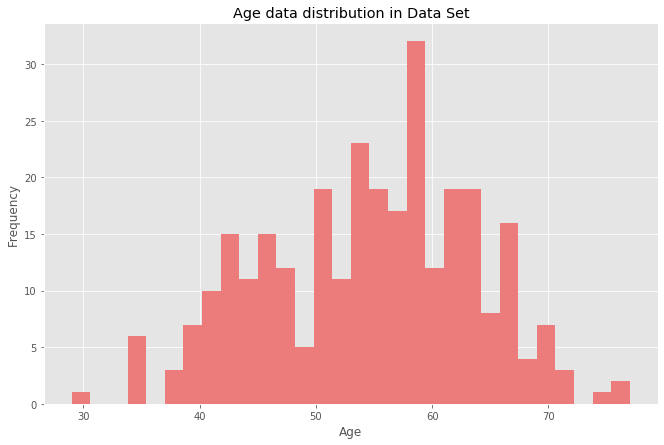

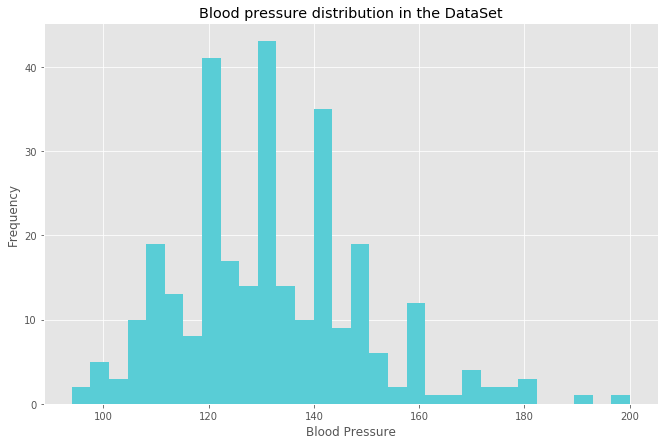

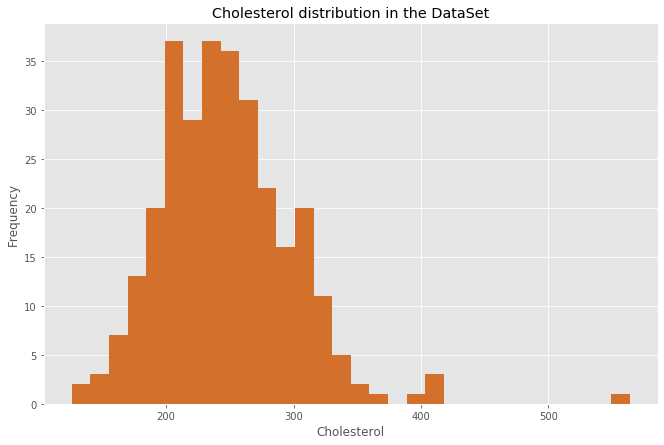

In [73]:
plt.style.use('ggplot')

#Identify the age distirbution to check whether data is normally distributed or outliers can be seen
plt.figure(figsize= (11,7))
plt.hist(dataSet.Age, color= '#EC7B7B', bins=30)
plt.title("Age data distribution in Data Set")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#Distribution of Bloodpressure in the DataSet
plt.figure(figsize= (11,7))
plt.hist(dataSet.BloodPressure, color = "#59CDD6", bins = 30)
plt.title("Blood pressure distribution in the DataSet")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()


#Distribution of Cholesterol in the DataSet
plt.figure(figsize= (11,7))
plt.hist(dataSet.Cholesterol, color = "#D3702B", bins = 30)
plt.title("Cholesterol distribution in the DataSet")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

#### - Crosstab allows to create graph in a manner to have count of categorical variable associated with another.
- We have created comparison of chest pain level in heart disease presence and absence
- Surprisingly Typical Anigma patients have Heart Disease
- Atypical Anima patient are more who do not have Heart Disease presence
- Ideally any of the chest pain should at least have heart disease presence but here it is only typical anigma at maximum and skewed point.

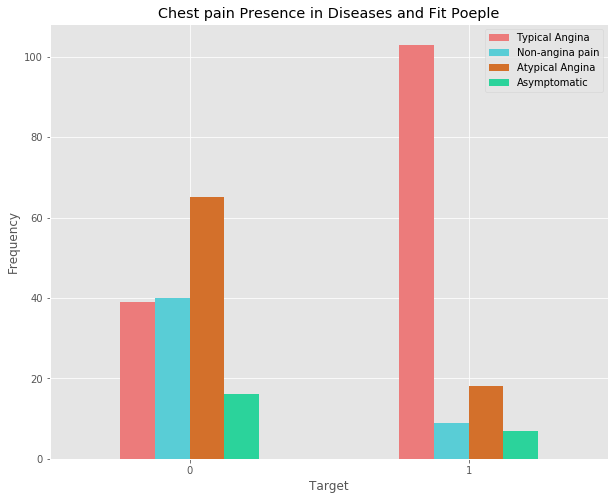

In [74]:
#Connection between Chest pains and Targeted Patient
pd.crosstab(dataSet.Target,dataSet.ChestPain).plot(kind="bar",figsize = (10,8), color = ["#EC7B7B","#59CDD6","#D3702B","#2BD39B"])
plt.title("Chest pain Presence in Diseases and Fit Poeple")
plt.xlabel("Target")
plt.xticks(rotation=0)
plt.legend(["Typical Angina","Non-angina pain","Atypical Angina","Asymptomatic"])
plt.ylabel("Frequency")
plt.show()

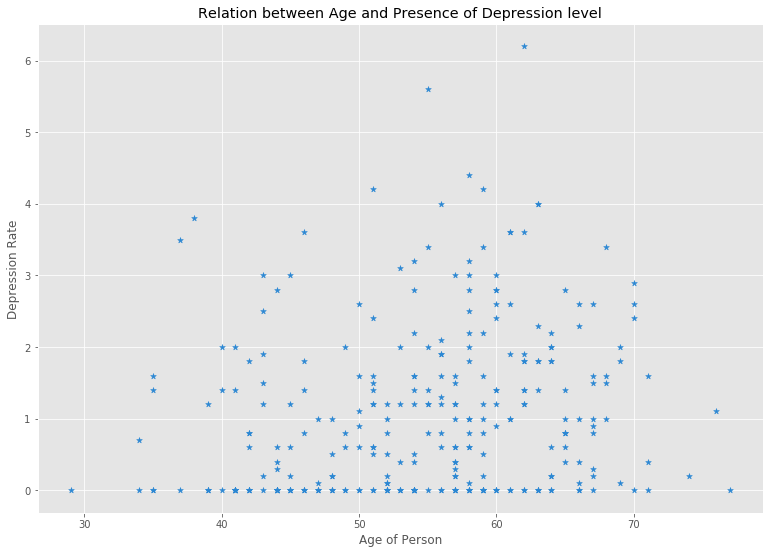

In [75]:
#With increase in the age, depression is rising and can be seen. But for initial few years it remains equivalent
#Depression rate in the age
plt.figure(figsize=(13,9))
plt.scatter(dataSet.Age, dataSet.Depression, marker="*", color = "#2B87D3")
plt.xlabel("Age of Person")
plt.ylabel("Depression Rate")
plt.title("Relation between Age and Presence of Depression level")
plt.show()

#### Seaborn is a great library and it allows to create multiple visualization:
- The below graph calculates amount of Male and Female considered in an observation. The result is close or more than half of the value

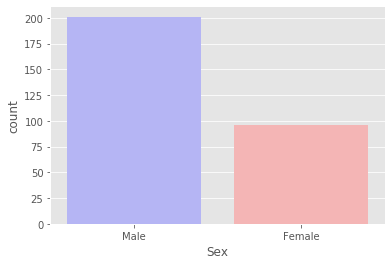

In [76]:
sns.countplot(dataSet.Sex, palette='bwr')
plt.show()

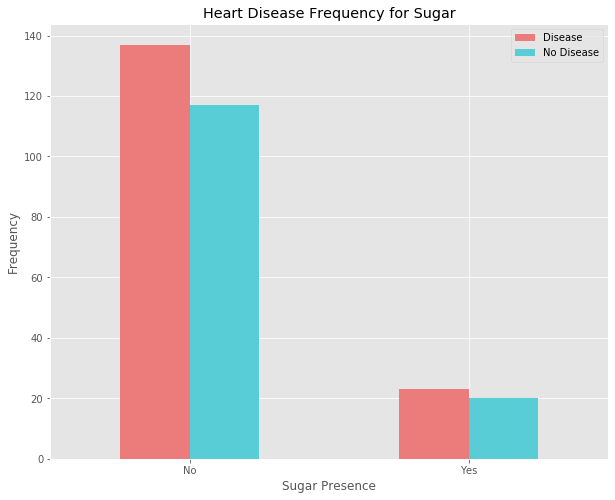

In [77]:
# Most of the patients seem have no sugar but still the amount of presence of Heart disease is almost same.
#In fact with sugar the count is very close.


# Relationship between Heart Disease with Sugar
pd.crosstab(dataSet.Sugar,dataSet.Target).plot(kind="bar",figsize = (10,8), color = ["#EC7B7B","#59CDD6"])
plt.title("Heart Disease Frequency for Sugar")
plt.xlabel("Sugar Presence")
plt.xticks(rotation=0)
plt.legend(["Disease","No Disease"])
plt.ylabel("Frequency")
plt.show()

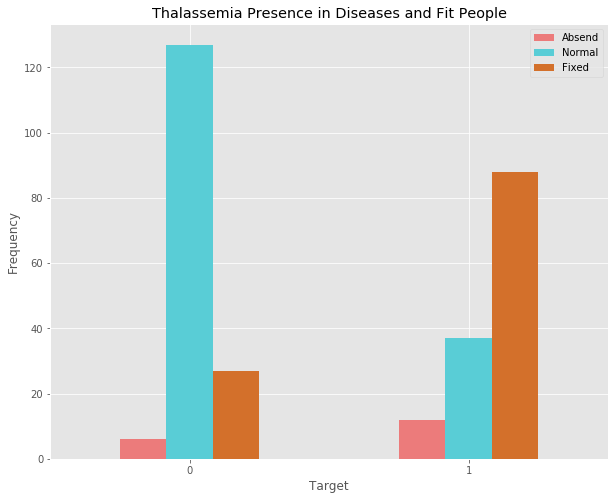

In [78]:
#Presence of Thelesemia and presence of Heart Disease
#Thalassemia presnece can cause heart disease and it can be seen from the visualization.
pd.crosstab(dataSet.Target,dataSet.Thal).plot(kind="bar",figsize = (10,8), color = ["#EC7B7B","#59CDD6","#D3702B","#2BD39B"])
plt.title("Thalassemia Presence in Diseases and Fit People")
plt.xlabel("Target")
plt.xticks(rotation=0)
plt.legend(["Absend","Normal","Fixed","Riversable"])
plt.ylabel("Frequency")
plt.show()

### Descriptive Analytics:

* Conclusion/Trends/Surprising Summary of Descriptive Statistics:
    - The data set contains more men than women so, it will be difficult to conclude about women. Also, there are chances that men are the most victim in case of heart disease then women.
    - Most of the patient is not too young and not too old. Also, when we check about blood pressure distribution we found out the variation is not huge and it is good.
    - Type of Anigma does matter to have heart disease and not every type of anigma causes heart disease
    - Depression rate is not so spread for all the sample patients
    - Weird though that the person who does not contain sugar has heart disease
    - Definitely Thalassemia has some effect for occurance of Heart Disease

In [83]:
#Checking Data types before Predictive modeling for conversion
dataSet.dtypes

Age              float64
Sex               object
ChestPain         object
BloodPressure    float64
Cholesterol      float64
Sugar             object
Ecg               object
HeartRate        float64
Agina             object
Depression       float64
Peak              object
Vesels            object
Thal              object
Target             int64
dtype: object

### Predictive Analytics:

1. Sklearn models to use for Prediction:
    - Scikit-learn is a huge library to build and predict the model. For the Capstone purpose, main agenda is to predict the presence of the Heart Disease in the patient using Classification models.
    - There are Several Classification models but for this project: I am going to use simple Logistic Regression and Decision Tree Model due to tree like hierarchy of Data Set


2. Predictive Analytics with Answers:
    - To evaluate the model, I have decided to use Confusion Matrix to avoid any trouble. Here we can rely on Precision and Sensetivity more instead of Accuracy only. But, Accuracy is also a key point.

In [94]:
#Since many attributes are categorical, it is important to convert labels into one hot encoder or we can dummy variable techniques directly.

#Create predictors and response variable
X = dataSet.iloc[:,:-1].values
y = dataSet.iloc[:,-1].values

#Label encoding of all the categorical variable
from sklearn.preprocessing import LabelEncoder
lblenc = LabelEncoder()
X[:,1] = lblenc.fit_transform(X[:,1])
X[:,2] = lblenc.fit_transform(X[:,2])
X[:,5] = lblenc.fit_transform(X[:,5])
X[:,6] = lblenc.fit_transform(X[:,6])
X[:,8] = lblenc.fit_transform(X[:,8])
X[:,10] = lblenc.fit_transform(X[:,10])
X[:,11] = lblenc.fit_transform(X[:,11])
X[:,12] = lblenc.fit_transform(X[:,12])
X.shape

(297, 13)

In [100]:
#Creating Dummy variable by using HotEncoder Technique
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categorical_features=[[1,2,5,6,8,10,11,12]])
X = encoder.fit_transform(X).toarray()

In [96]:
#Verifying the shape will change after encoding
X.shape

(297, 28)

In [97]:
#Splitting data set in train and test the ration will be 80:20 for train:test. Train data set will be used to trained the model
# Test data set will be used to test the model and output of the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

#Creating First Simple Logistics Regression Model with training model and predicting the value
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

#Confusion Matrix is the preferable way to measure accuracy of a classification model.
cm = confusion_matrix(y_pred,y_test)
cm

array([[27,  7],
       [ 3, 23]])

In [98]:
#Decision Tree Model building using Scikit-learn libraries
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state= 0,)
classifier.fit(X_train,y_train)
y_pred1 = classifier.predict(X_test)

#Confusion Matrix for accuracy
cm1 = confusion_matrix(y_pred1,y_test)
cm1

array([[22,  9],
       [ 8, 21]])